Import General Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

Import Machine-Learning Dependencies

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

Load Datasets.  

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The PassengerId, Name, and Ticket columns don't appear to offer any value in predicting survival.
The Cabin column is missing too many values.
We will drop these four values in the next cell.

In [8]:
# Create a DataFrame with PassengerId that we will use for our solution later.
solution_df = pd.DataFrame(test['PassengerId'])

# Drop PassengerId, Name, Cabin, and Ticket columns from train and test dataframes.
train = train.drop(['PassengerId','Name','Cabin','Ticket'], axis=1)
test = test.drop(['PassengerId','Name','Cabin','Ticket'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
# Check the number of different values in Pclass, Embarked, SibSp, and Sex columns.
print(f"Pclass values:{train['Pclass'].unique()}")
print(f"Embarked values:{train['Embarked'].unique()}")
print(f"SibSp values:{train['SibSp'].unique()}")
print(f"Sex values:{train['Sex'].unique()}")

Pclass values:[3 1 2]
Embarked values:['S' 'C' 'Q' nan]
SibSp values:[1 0 3 4 2 5 8]
Sex values:['male' 'female']


Pclass, Embarked, and Sex columns are all categorical values that we need to convert into numeric values.

In [12]:
# Use 'get_dummies' method to convert Sex, Embarked, and Pclass columns to numeric.
train = pd.get_dummies(train, drop_first = True, columns = ['Sex','Embarked','Pclass'])
test = pd.get_dummies(test, drop_first = True, columns = ['Sex','Embarked','Pclass'])

In [13]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


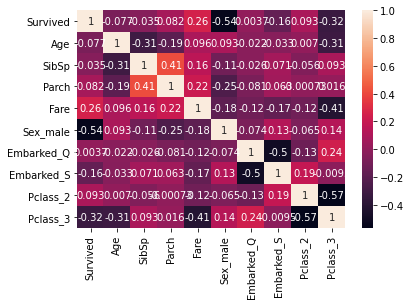

In [15]:
#Now that we have all numeric values, we can plot the correlation coefficient
correlation = train.corr(method='pearson')
sns.heatmap(correlation,annot=True)
plt.show()

Pearson model says that .3-.49 indicates moderate correlation and .50-1 indicates strong correlation

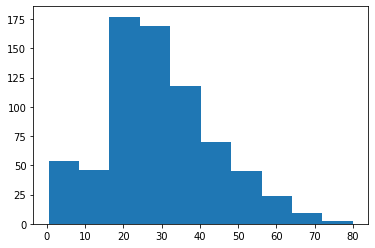

In [16]:
plt.hist(train['Age'])
plt.show()

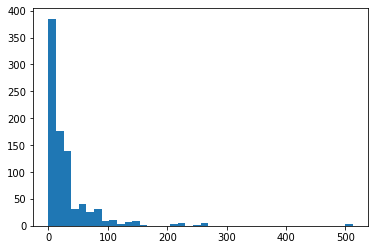

In [17]:
plt.hist(train['Fare'],bins=40)
plt.show()

In [19]:
# Use SimpleImputer to fill in nan values in Age columns and one missing in Fare column using 'mean' strategy.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
train['Age'] = imp.fit_transform(train['Age'].values.reshape(-1,1))
test['Age'] = imp.fit_transform(test['Age'].values.reshape(-1,1))
test['Fare'] = imp.fit_transform(test['Fare'].values.reshape(-1,1))

In [20]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    uint8  
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
 8   Pclass_2    891 non-null    uint8  
 9   Pclass_3    891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        418 non-null    

In [22]:

scaler = RobustScaler()
train['Age'] = scaler.fit_transform(train['Age'].values.reshape(-1,1))
train['Fare'] = scaler.fit_transform(train['Fare'].values.reshape(-1,1))
test['Age'] = scaler.fit_transform(test['Age'].values.reshape(-1,1))
test['Fare'] = scaler.fit_transform(test['Age'].values.reshape(-1,1))

In [23]:
# Split datasets into X and y sets.
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test  = test

In [29]:
# Use GridSearch to find optimal parameter values for LogisticRegression model.
# model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# penalties = ['l1', 'l2', 'elasticnet']
# c_values = [100, 10, 1.0, 0.1, 0.01]
# grid = dict(solver = solvers, penalty = penalties, C = c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator = model, param_grid = grid, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score = 0)
# grid_result = grid_search.fit(X_train, y_train)
# print(f"Best score: {round(grid_result.best_score_,4) * 100}% with params: {grid_result.best_params_}")

Best score: 80.99% with params: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [50]:
# Implement LogisticRegression model with optimal parameters.
model = LogisticRegression(C=.1,penalty='l2',solver='newton-cg')
model.fit(X_train,y_train)
predictions = model.predict(X_test)

# Create DataFrame of predictions and save as csv.
logreg_solution = solution_df.copy()
logreg_solution['Survived'] = predictions
logreg_solution.to_csv('logreg_solution.csv',index=False)

In [51]:
# Use GridSearch to find optimal parameter values for RidgeClassifier model.
# model = RidgeClassifier()
# alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# grid = dict(alpha=alpha)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print(f"Best score: {round(grid_result.best_score_,4) * 100}% with params: {grid_result.best_params_}")

In [52]:
# Implement RidgeClassifier model with optimal parameters.
model = RidgeClassifier(alpha=.2)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

# Create DataFrame of predictions and save as csv.
ridge_solution = solution_df.copy()
ridge_solution['Survived'] = predictions
ridge_solution.to_csv('ridge_solution.csv',index=False)

In [53]:
# Use GridSearch to find optimal parameter values for KNeighborsClassifier model.
# model = KNeighborsClassifier()
# n_neighbors = range(1, 21, 2)
# weights = ['uniform', 'distance']
# metric = ['euclidean', 'manhattan', 'minkowski']
# grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print(f"Best score: {round(grid_result.best_score_,4) * 100}% with params: {grid_result.best_params_}")

In [54]:
# Implement KNeighborsClassifier model with optimal parameters.
model = KNeighborsClassifier(metric='manhattan',n_neighbors=15,weights='uniform')
model.fit(X_train,y_train)
predictions = model.predict(X_test)

# Create DataFrame of predictions and save as csv.
knn_solution = solution_df.copy()
knn_solution['Survived'] = predictions
knn_solution.to_csv('knn_solution',index=False)

In [55]:
# Use GridSearch to find optimal parameter values for SVC model.
# model = SVC()
# kernel = ['poly', 'rbf', 'sigmoid']
# C = [50, 10, 1.0, 0.1, 0.01]
# gamma = ['scale']
# grid = dict(kernel=kernel,C=C,gamma=gamma)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print(f"Best score: {round(grid_result.best_score_,4) * 100}% with params: {grid_result.best_params_}")

In [56]:
# Implement SVC model with optimal parameters.
model = SVC(C=50,gamma='scale',kernel = 'rbf')
model.fit(X_train,y_train)
predictions = model.predict(X_test)

# Create DataFrame of predictions and save as csv.
svc_solution = solution_df.copy()
svc_solution['Survived'] = predictions
svc_solution.to_csv('svc_solution.csv',index=False)

In [57]:
# Use GridSearch to find optimal parameter values for BaggingClassifier model.
# model = BaggingClassifier()
# n_estimators = [10, 100, 1000]
# grid = dict(n_estimators=n_estimators)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print(f"Best score: {round(grid_result.best_score_,4) * 100}% with params: {grid_result.best_params_}")

In [58]:
# Implement BaggingClassifier model with optimal parameters.
model = BaggingClassifier(n_estimators = 100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
bagging_solution = solution_df.copy()
bagging_solution['Survived'] = predictions
bagging_solution.to_csv('bagging_solution.csv',index=False)

In [59]:
# Use GridSearch to find optimal parameter values for RandomForestClassifier model.
# model = RandomForestClassifier()
# n_estimators = [100, 200, 500, 750, 1000]
# max_depth = [3, 5, 7, 9]
# min_child_weight = [1, 3, 5]
# # gamma = [i/10.0 for i in range(0,5)]
# # subsample = [i/10.0 for i in range(6,10)]
# # colsample_bytree = [i/10.0 for i in range(6,10)]
# # reg_alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 1]
# learning_rate = [0.01, 0.02, 0.05, 0.1]
# max_features = ['sqrt', 'log2']
# grid = dict(n_estimators=n_estimators, max_depth = max_depth, min_child_weight = min_child_weight, max_features=max_features)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print(f"Best score: {round(grid_result.best_score_,4) * 100}% with params: {grid_result.best_params_}")

In [60]:
# Implement RandomForestClassifier model with optimal parameters.
model = RandomForestClassifier(max_features = 'sqrt', n_estimators = 1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Create DataFrame of predictions and save as csv.
forest_solution = solution_df.copy()
forest_solution['Survived'] = predictions
forest_solution.to_csv('forest_solution.csv', index = False)

In [61]:
# Use GridSearch to find optimal parameter values for GradientBoostingClassifier model.
# model = GradientBoostingClassifier()
# n_estimators = [10, 100, 1000]
# learning_rate = [0.001, 0.01, 0.1]
# subsample = [0.5, 0.7, 1.0]
# max_depth = [3, 7, 9]
# grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print(f"Best score: {round(grid_result.best_score_,4) * 100}% with params: {grid_result.best_params_}")

In [62]:
# Implement GradientBoostingClassifier model with optimal parameters.
model = GradientBoostingClassifier(learning_rate = 0.001, max_depth = 9, n_estimators = 1000, subsample = 0.7)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Create DataFrame of predictions and save as csv.
gradient_solution = solution_df.copy()
gradient_solution['Survived'] = predictions
gradient_solution.to_csv('gradient_solution.csv', index = False)

In [194]:
# Create a DataFrame with 'survived' values from each model as a column.
solutions = {'logreg':logreg_solution['Survived'].values,
             'ridge':ridge_solution['Survived'].values,
             'knn':knn_solution['Survived'].values,
             'svc':svc_solution['Survived'].values,
             'bagging':bagging_solution['Survived'].values,
             'forest':forest_solution['Survived'].values,
             'gradient':gradient_solution['Survived'].values
             }

consensus_df = pd.DataFrame(data=solutions,index=solution_df['PassengerId'])

# Create a column with the total number of 'survived' values, and then a column with the consensus.
consensus_df['confidence'] = sum([x for x in solutions.values()])
consensus_df['consensus'] = [0 if x < 4 else 1 for x in consensus_df['confidence'].values]

# Create solution file and save as csv.
consensus_solution = consensus_df.drop(['logreg','ridge','knn','svc','bagging','forest','gradient','confidence'],axis=1)
consensus_solution = consensus_solution.rename(columns = {'consensus':'Survived'})
consensus_solution.to_csv('consensus_solution.csv',index=True)

In [198]:
# Create refined consensus using the 3 models with highest accuracy.
solutions_2 = {'bagging':bagging_solution['Survived'].values,
               'forest':forest_solution['Survived'].values,
               'gradient':gradient_solution['Survived'].values}
consensus_2 = pd.DataFrame(data=solutions_2,index=solution_df['PassengerId'])
consensus_2['confidence'] = sum([x for x in solutions_2.values()])
consensus_2['consensus'] = [0 if x in [0,1] else 1 for x in consensus_2['confidence'].values]

# Create solution file and save as csv.
consensus_2 = consensus_2.drop(['bagging','forest','gradient','confidence'],axis=1)
consensus_2 = consensus_2.rename(columns = {'consensus':'Survived'})
consensus_2.to_csv('consensus_2.csv',index=True)